# Анализ и прогнозирование неоднородных временных рядов, БИ

## НИУ ВШЭ, 2022-23 учебный год

### Домашнее задание №3. Библиотеки Pandas и Matplotlib

Задание выполнил: Бородин Владимир

### Общая информация

__Дата выдачи:__ 16.11.2022

__Дедлайн:__ 04:00 27.11.2022

### Оценивание и штрафы

Каждая задача оценивается в 3 балла.

Оценка за ДЗ вычисляется по следующей формуле:

$$
s_{\text{pandas}} \times 10/48 ,
$$

где $s_{\text{pandas}}$  — количество баллов, которое вы набрали в сумме по задачам.

За сдачу задания позже срока на итоговую оценку за задание накладывается штраф в размере 1 **вторичный** балл в день, но  задержка не может быть больше недели.

**Важно:** В этом домашнем задании предусмотрено несколько заданий, за которые можно получить бонусные баллы. Бонусные баллы прибавляются к обычным баллам, и может выйти так, что ваша итоговая оценка станет больше 10. В таком случае именно это и будет являться вашей оценкой. То есть за это ДЗ **можно** получить больше 10

__Внимание!__ Домашнее задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.

### Формат сдачи

Загрузка файлов с решениями происходит в системе [Anytask](https://anytask.org/). Необходимо загружать файл с расширением .ipynb (питоновский ноутбук)

Инвайт для подключения к странице курса в системе - указан для каждой группы в нашем телеграмм-канале

### О задании

В данном домашнем задании вы попрактикуетесь в работе с библиотекой pandas и matplotlib!

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

%matplotlib inline

Обратите внимание, что практически во всех заданиях вам потребуется написать какой-то текст в виде вывода/результата/итога/какого-то резюме. Пожалуйста, не ленитесь, и пишите выводы ***подробно***, существенная часть баллов будет выставляться именно за выводы, так как в анализе данных они имеют большое значение. Таким образом, на любое задание, сформулированное в виде вопроса, отвечайте текстом, подкрепляя ваши слова написанным и выполненным кодом. Текст выводов/комментариев пишите в отдельных ячейках, используя средства текстового редактора Jupyter Notebook/Google Colab, при необходимости используйте средства *выделения*.

При решении задач, когда вам необходимо сделать какой-то фильтр, срез, выборку, или иное действие с данными, запрещается использовать циклы (`for`, `while`) и оператор `if`.

Также в некоторых заданиях от вас будет требоваться построить графики. Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей. Пожалуйста, не пренебрегайте оформлением, поскольку в этом ДЗ это тоже оценивается.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()` и другие*

### 1

В этом домашнем задании вы поработаете с данными о пассажирах с затонувшего «Титаника», которые мы уже раннее кратко рассматривали на лекции. 

Описание данных, а также сами данные (откуда их следует скачать) находятся по следующей ссылке:

https://www.kaggle.com/c/titanic/data

Откройте в ноутбуке файл с данными ("train.csv"). Какой размер имеет таблица? Выведите первые 5 и последние 5 строк.

In [ ]:
data = pd.read_csv("train.csv", delimiter=',')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
data.shape

(891, 12)

Размер таблицы - 891 строка на 12 столбцов. Объектов - 891, а призников 12

### 2

Для каждого признака в рассматриваемых данных укажите тип этого признака

*Подсказка. Лекция 3 вам поможет!*

PassengerId (id пассажира) - номинальный призник

Survived (выжил?) - бинарный признак (1 - да, 0 - нет)

Pclass (класс пассажира) - порядковый признак

Name (имя) - номинальный признак

Sex (пол) - бинарный признак (M - мужской, F - женский)

Age (возраст) - вещественный признак

SibSp(кол-во братьев и сестер) - вещественный признак

Parch(сколько с пассажиром родителей и детей) - вещественный признак

Ticket(№ билета) - номинальный призник

Fare(стоимость билета) - вещественный признак

Cabin(каюта) - категориальный признак (не номинальный, т.к. в одной каюте могут жить несколько человек)

Embarked(точка отправки) - категориальный признак, но если смотреть по очередности заезда в порты, то может быть порядковым


In [ ]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### 3

Придумайте три какие-нибудь задачи анализа данных, которые можно было бы решать для данного датасета:

1. Задачу регрессии - то есть иными словами предсказания некоего целочисленного результата для каждого объекта
2. Задачу классификации - то есть иными словами отнесения каждого объекта к какому-то одному из двух или более заранее заданных классов (групп)
3. Задачу кластеризации - то есть иными словами разделения всех объектов на неизвестное заранее количество групп по принципу их похожести друг на друга

*Подробнее вы можете прочитать про то, что представляют собой задачи регрессии, классификации, кластеризации, например, в Википедии. Также простым языком и на конкретном примере это расписано, например, вот в этой [статье](https://habr.com/ru/company/simbirsoft/blog/565396/) (в начале)*

1. Предсказание цены билета "fare" на основе признаков "embarked", "Pclass" и "Age" (вдруг для детей тарифы ниже).
2. Выжил/не выжил на основе признаков "пол", "класс" и "возраст" или определение класса пассажира на основе признаков "fare" и "survived".
3. Разбиение объектов на группы на основании признаков "Age" и "Sex" так, чтобы пассажиры внутри групп были +- похожими друг на друга.


### 4

Какова доля выживших после крушения пассажиров? Какова доля мужчин и женщин среди выживших?

In [ ]:
print(data['Survived'].mean())

0.3838383838383838


Достаточно просто найти среднее, это и будет ответом

In [ ]:
alive = data[data['Survived']==1]
print(alive[alive['Sex']=='male'].shape[0] / alive.shape[0])   #shape[0] - количество рядов
print(alive[alive['Sex']=='female'].shape[0] / alive.shape[0])

0.31871345029239767
0.6812865497076024


Среди выживших 31.87% мужчин и 68.13% женщин

### 5

Сколько пассажиров ехало в каждом классе? Кого было больше в самом многолюдном классе — мужчин или женщин?

In [ ]:
data[data['Pclass']==1].shape[0], data[data['Pclass']==2].shape[0], data[data['Pclass']==3].shape[0]

(216, 184, 491)

In [ ]:
third_is_max = data[data['Pclass']==3]
third_is_max[third_is_max['Sex'] == 'male'].shape[0], third_is_max[third_is_max['Sex'] == 'female'].shape[0]

(347, 144)

Больше всего пассажиров было в 3 классе - 491. Из них большинство мужчин - 347 человек, и всего 144 женщины.

### 6

Выведите минимальную, среднюю и максимальную сумму, которую заплатили пассажиры за проезд. Проделайте то же самое только для тех пассажиров, которые сели на корабль в Саутгемптоне. Выведите гистограммы, показывающие распределения стоимостей билетов в зависимости от места посадки. Что можно сказать на основе результатов, которые вы получаете?

In [ ]:
data['Fare'].min(), data['Fare'].mean(), data['Fare'].max()

(0.0, 32.204207968574636, 512.3292)

In [ ]:
sg = data[data['Embarked']=='S']
sg['Fare'].min(), sg['Fare'].mean(), sg['Fare'].max()

(0.0, 27.079811801242233, 263.0)

Кто-то из пассажиров умудрился прокатиться бесплатно, максимальная цена за билет составила 512.33 доллара, а средняя цена составляет 32.2.
Самый дорогой билет из Саутгемптона стоил 263 доллара, самый дешевый был бесплатным, ну а средняя цена билета из Саутгемптона равнялась 27$.

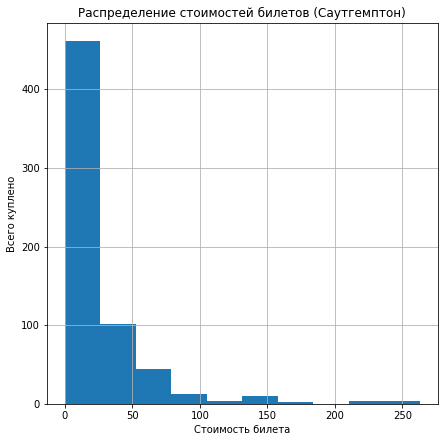

In [ ]:
plt.figure(figsize=(7,7))
plt.title('Распределение стоимостей билетов (Саутгемптон)')
data[data['Embarked']=='S']['Fare'].hist()
plt.xlabel('Стоимость билета')
plt.ylabel('Всего куплено')
plt.show()

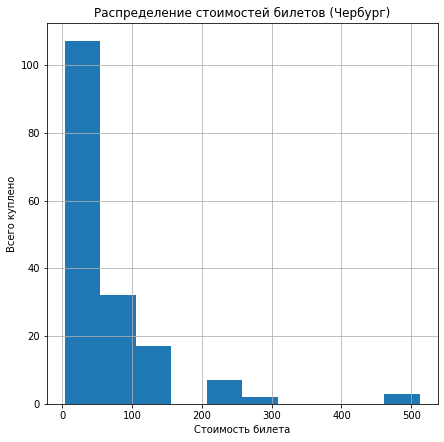

In [ ]:
plt.figure(figsize=(7,7))
plt.title('Распределение стоимостей билетов (Чербург)')
data[data['Embarked']=='C']['Fare'].hist()
plt.xlabel('Стоимость билета')
plt.ylabel('Всего куплено')
plt.show()

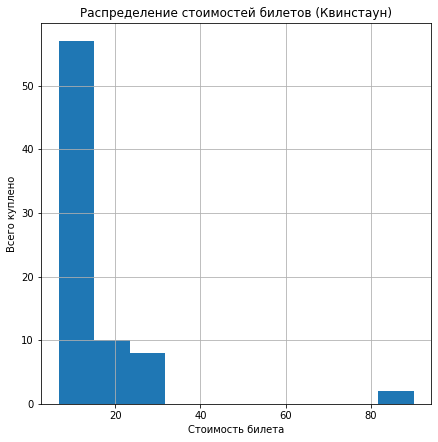

In [ ]:
plt.figure(figsize=(7,7))
plt.title('Распределение стоимостей билетов (Квинстаун)')
data[data['Embarked']=='Q']['Fare'].hist()
plt.xlabel('Стоимость билета')
plt.ylabel('Всего куплено')
plt.show()

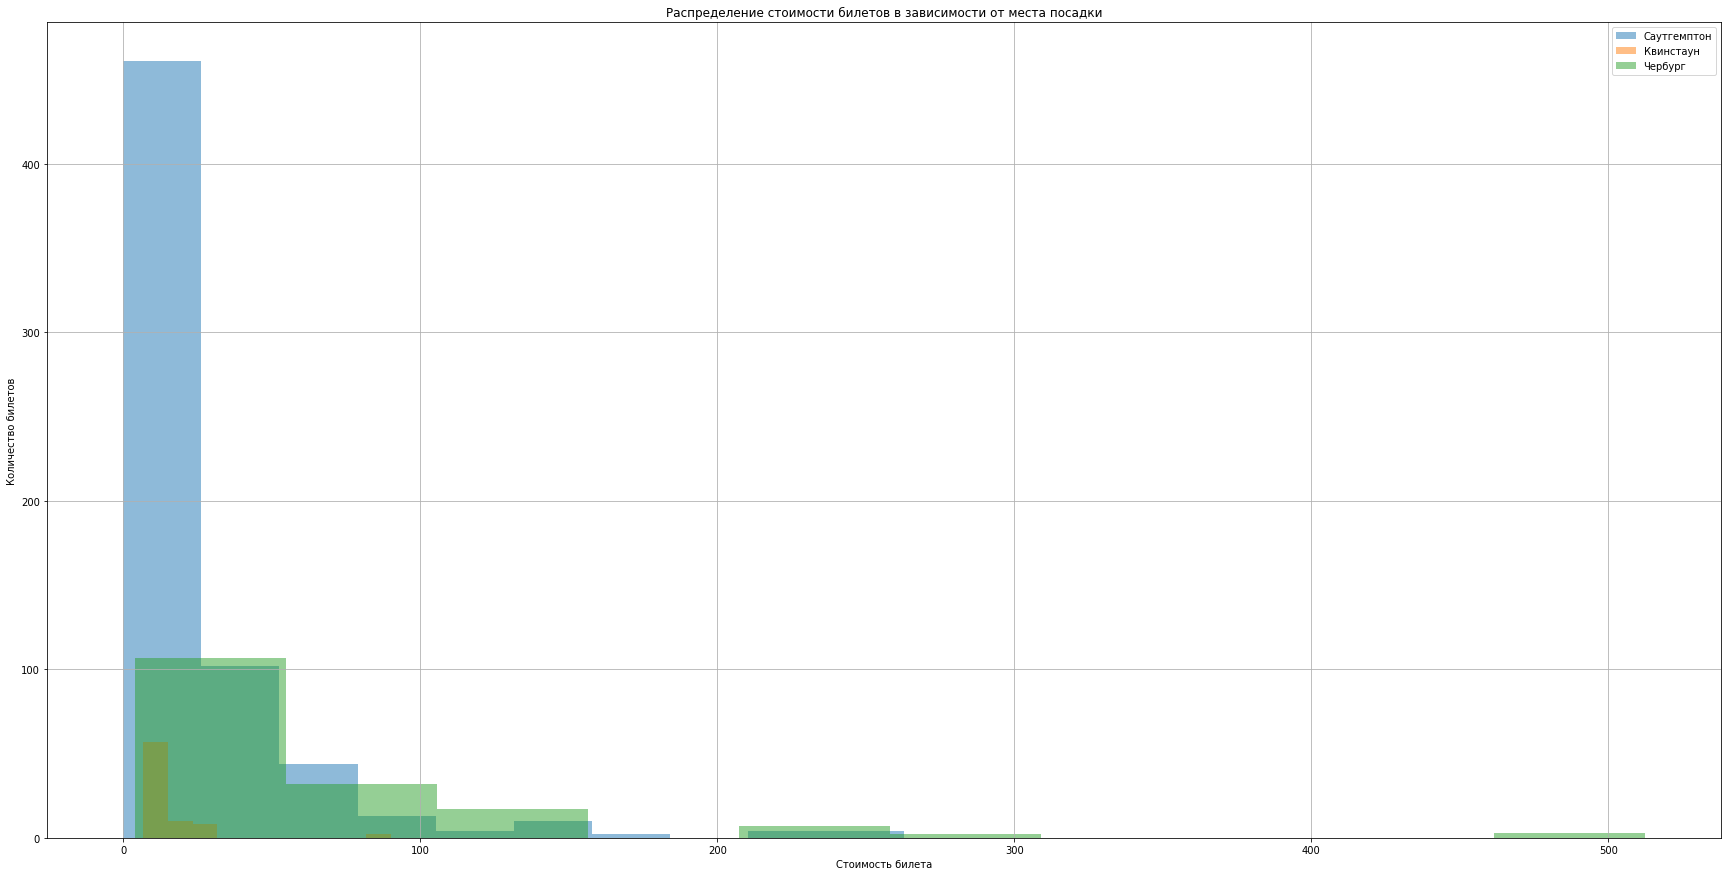

In [ ]:
plt.figure(figsize=(30,15))
plt.title('Распределение стоимости билетов в зависимости от места посадки')
plt.hist(data[data["Embarked"]=="S"]["Fare"], alpha=0.5)
plt.hist(data[data["Embarked"]=="Q"]["Fare"], alpha=0.5)
plt.hist(data[data["Embarked"]=="C"]["Fare"], alpha=0.5)
plt.legend(['Саутгемптон', 'Квинстаун', 'Чербург'])
plt.xlabel('Стоимость билета')
plt.ylabel('Количество билетов')
plt.grid(True)
plt.show()

Вывод: В каждом месте посадки самыми популярными были более дешевые билеты. Меньше всего пассажиров село на борт в Квинстауне, больше всего - в Саутгемптоне.В Чербурге зафиксированы самые дорогие цены на билеты, за которые в Квинстауне врядли бы согласились платить. Также в Кванстауне заметен значительный ченовой разрыв в стоимости билетов. Скорее всего, вся эта статистика связана с платежеспособностью местного населения и расположением порта относительно конечной точки маршрута.


### 7

Все ли признаки несут в себе полезную информацию? Почему? Избавьтесь от ненужных столбцов. Свой выбор аргументируйте

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data = data.drop(columns=['PassengerId', 'Ticket'], axis=1)   #теперь у нас в data этих столбцов больше не будет
data.head()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


Нет, присутствуют и столбцы с ненужной информацией, которую использовать не получится. Это "PassangerID", т.к. этот признак уникален и нужен только для идентификации пассажира. Еще это номер билета - "Ticket". Поэтому можно все их убрать и обращаться к каждому человеку по индексу строки (n-му пассажиру соответствует индекс [n-1]). Что касается имени и номера каюты ("Name", "Cabin"), то их все-таки убирать не стоит. Вдруг мы захотим найти самое часто упоминаемое имя среди выжившиих, что неразунмно, но вполне возможно. Или, например, проверить в какой жилой секции коробля было больше всего выживших.

### 8

Есть ли в данных пропуски? Если да, то в каких столбцах? Сколько пропусков в каждом из них?

In [ ]:
miss = data.isnull()
miss.sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

В трех столбцах есть пропуски(Age, Cabin и Embarked): у двоих отсутствует название порта, из которого они отправлялись; у 177 человек нет возраста; нет информации о каютах 687 пассажиров

### 9

Подумайте, как стоит заполнить пропуски в каждом столбце, и сделайте это. Проверьте, что пропусков нигде не осталось.

*Подсказка. Лекция 3 вам поможет!*

Отсутствующий возраст, естественно, заменим на средний. Номер каюты можно взять как 0. Порт отправки можно как взять строку "not given", так и присвоить букву 'S'. У нас ведь всего у 2 пассажиров нет обозначенного места отправки, и каким бы оно ни было, все равно порт "S" останется самым массовым.

In [ ]:
data["Age"].fillna(data["Age"].mean())
data["Cabin"].fillna(0)
data["Embarked"].fillna('S')
check = data.isnull()
check.sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

### 10

Посчитайте, насколько сильно коррелируют друг с другом цена за билет и возраст пассажиров. Также проверьте наличие этой зависимости визуально (в этом вам поможет построение [диаграммы рассеяния](https://ru.wikipedia.org/wiki/%D0%94%D0%B8%D0%B0%D0%B3%D1%80%D0%B0%D0%BC%D0%BC%D0%B0_%D1%80%D0%B0%D1%81%D1%81%D0%B5%D1%8F%D0%BD%D0%B8%D1%8F)). Какие выводы можно сделать?

In [ ]:
correlation = data[['Fare', 'Age']]
correlation.corr()

,Fare,Age
Fare,1.000000,0.096067
Age,0.096067,1.000000


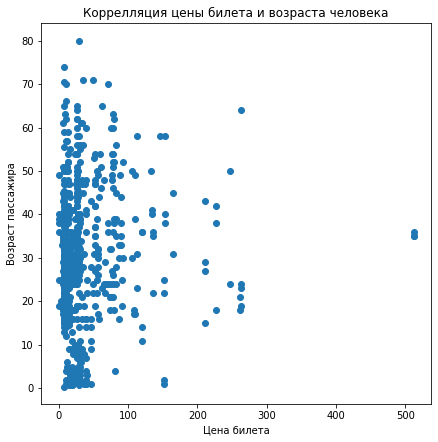

In [ ]:
plt.figure(figsize=(7,7))
plt.title('Коррелляция цены билета и возраста человека')
plt.xlabel('Цена билета')
plt.ylabel('Возраст пассажира')
plt.scatter(data["Fare"], data["Age"],)
plt.show()

Коэффицент корреляции (0.091566) далек от 1, значит, связь возраста и цены билета довольно слабая. Основная масса пассажиров независимо от возраста предпочитала недорогие билеты. Слишком юные (до 10 лет) и чересчур пожилые (70+ лет) люди не приобритали билеты в диапазоне цен 200-300$. Те, кто купил самые дорогие билеты находились в средней возрастной группе.

### 11

Правда ли, что чаще выживали пассажиры с более дорогими билетами? А есть ли зависимость выживаемости от класса? Свой ответ аргументируйте!

In [ ]:
fare = data["Fare"]
data["Survived"].corr(fare)

0.2573065223849625

In [ ]:
data["Fare"].mean()

32.204207968574636

In [ ]:
data[data["Survived"]==1]["Fare"].mean()

48.39540760233918

In [ ]:
data[data["Survived"]==0]["Fare"].mean()

22.117886885245902

По корреляциия мы видим, что зависимость между ценой билета и тем, выжил ли человек, присутствует. При средней цене билета в 32.2$ те, кто выжил, в среднем платили 48.4$ за билет, а погибшие - 22.2$. Это значит, что пассажиры с более дорогими билетами чаще выживали.

In [ ]:
clasS = data["Pclass"]
data["Survived"].corr(clasS)

-0.3384810359610148

In [ ]:
data.groupby("Pclass")["Survived"].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

Шансы выжить в первом классе составляли 62,96%, во втором - 47,3% и 24,2% в третьем. 

In [ ]:
data[data["Survived"]==0].groupby("Pclass").count(), data[data["Survived"]==1].groupby("Pclass").count()

(        Survived  Name  Sex  Age  SibSp  Parch  Fare  Cabin  Embarked
 Pclass                                                               
 1             80    80   80   64     80     80    80     59        80
 2             97    97   97   90     97     97    97      3        97
 3            372   372  372  270    372    372   372      6       372,
         Survived  Name  Sex  Age  SibSp  Parch  Fare  Cabin  Embarked
 Pclass                                                               
 1            136   136  136  122    136    136   136    117       134
 2             87    87   87   83     87     87    87     13        87
 3            119   119  119   85    119    119   119      6       119)

В 1 классе умерло 80 человек, а выжило 136. Из второго осталось в живых 87, а погибло 97. В 3 классе на 119 выживших приходится 372 погибших. Здесь можно заметить, что несмотря на то, что 1 класс в отличие от 3-го не самый многочисленный, из него уцелело больше всех пассажиров (136). Из 3 класса же погибло больше всего - 372. Это еще раз говорит о том, что выживаемость зависит от класса.

### 12

Создание новых признаков (feature engineering) является одним из основных средств улучшения качества работы алгоритмов машинного обучения на этапе обработки данных, а также отличный способ улучшить качество ваших выводов из проделанного анализа в целом! Добавьте в таблицу столбец, который будет показывать, сколько родных плыло вместе с пассажиром на корабле, включая его самого. Чем может быть полезен такой признак?

In [ ]:
data['closePeople'] = data['SibSp'] + data['Parch'] + 1
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,closePeople
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,2
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,2
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,1


Используя этот признак, можно проверить: зависели ли шансы на выживание от нахождения на борту близких людей == кто выживал больше - одинокие люди или те, кто был не один; каким классом предпочитали путешествовать/за сколько приобретали билеты одинокие люди/с близкими и кто это были (больше мужчин или женщин). Можно также получить ответы на некоторые другие вопросы.

### 13

Теперь придумайте свой признак, который может быть полезен для анализа (несет в себе какую-то информацию), и добавьте его в таблицу. Обязательно аргументируйте, чем полезен ваш признак.

In [ ]:
data[data["Age"].isnull()] = np.round(data["Age"].mean(), decimals=1)

In [ ]:
data.loc[data["Age"] < 30, "AgeGroup"] = "Young"
data.loc[data["Age"] > 60, "AgeGroup"] = "Old"
data.loc[data["AgeGroup"].isnull(), "AgeGroup"] = "Adults"
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,closePeople,AgeGroup
0,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,7.2500,NaN,S,2.0,Young
1,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,71.2833,C85,C,2.0,Adults
2,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,7.9250,NaN,S,1.0,Young
3,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,53.1000,C123,S,2.0,Adults
4,0.0,3.0,"Allen, Mr. William Henry",male,35.0,0.0,0.0,8.0500,NaN,S,1.0,Adults


Я считаю, что разумно разделить всех пассажиров по возрастным группам (молодые - до 30 лет, пожилые - старше 60 лет, остальные - взрослые), так как но основе этого можно будет посчитать % выживаемости молодых людей, взрослых и пожилых. Также, например, можно посмотреть какая возрастная группа чаще всего путешествовала с близкими и какой класс выбирала. Да и в целом, какую часть та или иная группа составляла от всех пассажиров.

### 14

Придумайте какое-нибудь интересное задание на анализ предлагаемых данных и решите его. 

Креативность в этом задании приветствуется, и за нее можно получить 1-2 бонусных балла!

*Подсказка. Например, какая фамилия была самой популярной на корабле? (Лучше не используйте этот пример, а придумайте что-то своё)*

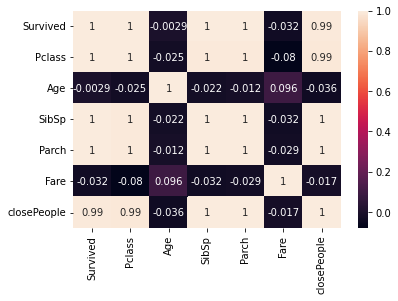

In [ ]:
sns.heatmap(data.corr(), annot = True)

Из данной диаграммы мы можем выделить следующие зависимости, некоторые из которых мы не упомянули ранее:
- выжил(не выжил)/класс
- класс/возраст пассажира
- класс/цена за билет
- возраст/наличие родителей и возраст/наличие братьев или сестер

In [ ]:
data['Pclass'].corr(data['Fare'])

-0.07976264124429472

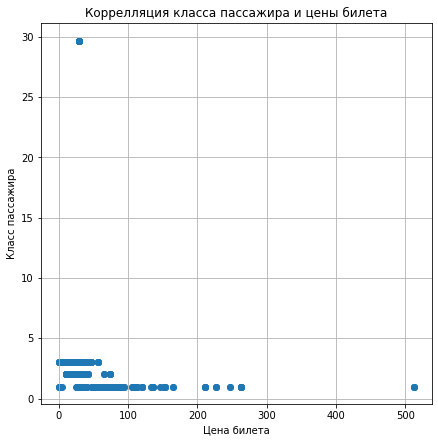

In [ ]:
plt.figure(figsize=(7,7))
plt.title('Коррелляция класса пассажира и цены билета')
plt.xlabel('Цена билета')
plt.ylabel('Класс пассажира')
plt.scatter(data["Fare"], data["Pclass"])
plt.grid(True)
plt.show()

В этом задании я рассмотрел корреляцию класса пассажира и цены билета. Видно, что во 2 и 3 классах билетов дорже 100$ не было - все цены быле в промежутке [0;100]. В 1 классе основная масса билетов находилась в диапазоне [0;300], но также были билеты свыше 500 долларов. 

In [ ]:
data['SibSp'].corr(data['Age'])

-0.021932757492231083

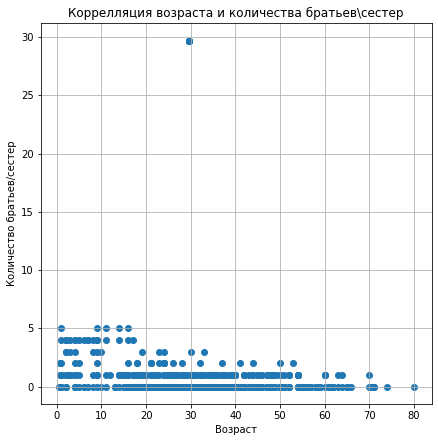

In [ ]:
plt.figure(figsize=(7,7))
plt.title('Коррелляция возраста и количества братьев\сестер')
plt.xlabel('Возраст')
plt.ylabel('Количество братьев/сестер')
plt.scatter(data["Age"], data["SibSp"])
plt.grid(True)
plt.show()

Легко заметить, что чем старше пассажир, тем меньше его братьев и/или сестер находились с ним на корабле. Максимум - 5 близких (у пассажиров до 20 лет), в то время как люди старше 70 были вовсе одни.

### 15

Постройте гистограммы распределения **вещественных** признаков. Есть ли в них разница? Чем это может быть плохо с точки зрения анализа данных и с точки зрения машинного обучения? Отнормируйте вещественные признаки и посмотрите, как изменилась ситуация. Какие выводы можно сделать из проделанной работы? 

Глубина ответа на теоретические вопросы в этом задании приветствуется, и за нее можно получить 1-2 бонусных балла!

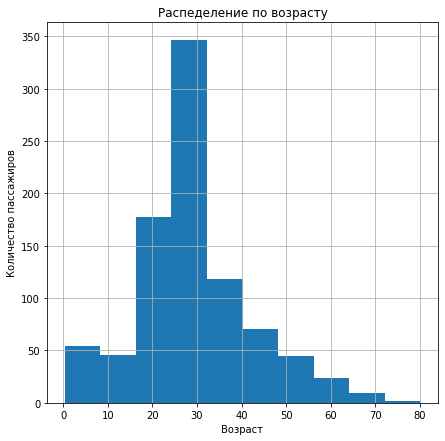

In [ ]:
plt.figure(figsize=(7,7))
plt.title('Распеделение по возрасту')
plt.xlabel('Возраст')
plt.ylabel('Количество пассажиров')
plt.hist(data["Age"])
plt.grid(True)
plt.show()

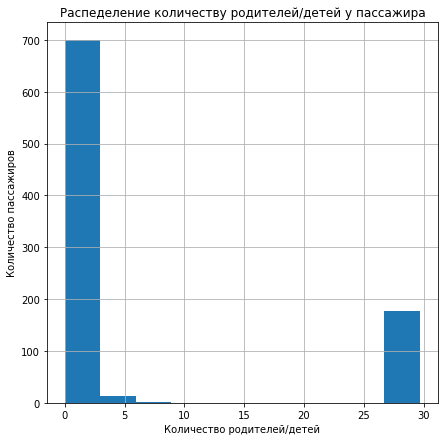

In [ ]:
plt.figure(figsize=(7,7))
plt.title('Распеделение количеству родителей/детей у пассажира')
plt.xlabel('Количество родителей/детей')
plt.ylabel('Количество пассажиров')
plt.hist(data["Parch"])
plt.grid(True)
plt.show()

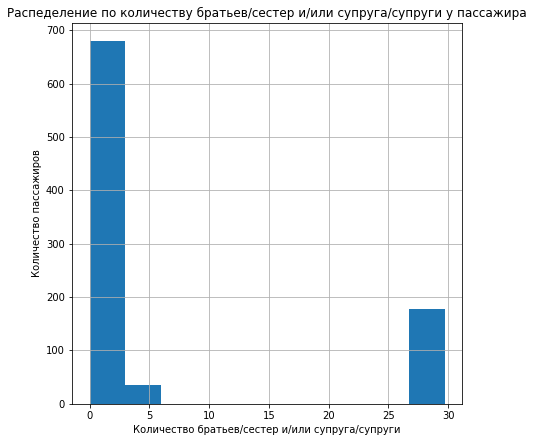

In [ ]:
plt.figure(figsize=(7,7))
plt.title('Распеделение по количеству братьев/сестер и/или супруга/супруги у пассажира')
plt.xlabel('Количество братьев/сестер и/или супруга/супруги')
plt.ylabel('Количество пассажиров')
plt.hist(data["SibSp"])
plt.grid(True)
plt.show()

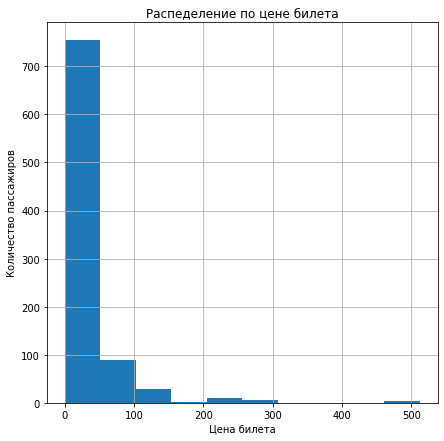

In [ ]:
plt.figure(figsize=(7,7))
plt.title('Распеделение по цене билета')
plt.xlabel('Цена билета')
plt.ylabel('Количество пассажиров')
plt.hist(data["Fare"])
plt.grid(True)
plt.show()

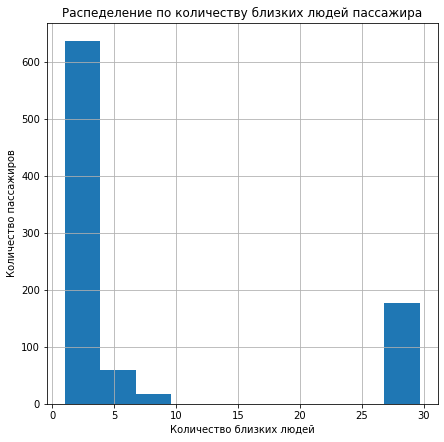

In [ ]:
plt.figure(figsize=(7,7))
plt.title('Распеделение по количеству близких людей пассажира')
plt.xlabel('Количество близких людей')
plt.ylabel('Количество пассажиров')
plt.hist(data["closePeople"])
plt.grid(True)
plt.show()

Так как у нас добавился еще один вещественный признак - количество близких людей, то по нему тоже строим гистограмму.

Проблема в том, что единицы измерения несовместимы, и это отразится на результатах. 
У всех признаков разный смысл - значит, диапазон  значений может быть огромный. Например: человек в возрасте 40 лек купил билет за 512 долларов. Нормализация обязательно нужна в задачах на классификацию и кластеризацию в машинном обучении, так как приведение признаков к каким-то определенным единицам позволит сравнивать их между собой в рамках одной ML-модели.

In [ ]:
#Нормировка вещественных признаков
data["new_Age"] = (data["Age"] - data["Age"].mean()) / data["Age"].std()

data["new_Fare"] = (data["Fare"] - data["Fare"].mean()) / data["Fare"].std()

data["new_Parch"] = (data["Parch"] - data["Parch"].mean()) / data["Parch"].std()

data["new_SibSp"] = (data["SibSp"] - data["SibSp"].mean()) / data["SibSp"].std()

data["new_closePeople"] = (data["closePeople"] - data["closePeople"].mean()) / data["closePeople"].std()

data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,closePeople,AgeGroup,new_Age,new_Fare,new_Parch,new_SibSp,new_closePeople
0,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,7.2500,NaN,S,2.0,Young,-0.592162,-0.557980,-0.533396,-0.454628,-0.489059
1,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,71.2833,C85,C,2.0,Adults,0.638417,0.792725,-0.533396,-0.454628,-0.489059
2,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,7.9250,NaN,S,1.0,Young,-0.284517,-0.543742,-0.533396,-0.540232,-0.578666
3,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,53.1000,C123,S,2.0,Adults,0.407683,0.409170,-0.533396,-0.454628,-0.489059
4,0.0,3.0,"Allen, Mr. William Henry",male,35.0,0.0,0.0,8.0500,NaN,S,1.0,Adults,0.407683,-0.541105,-0.533396,-0.540232,-0.578666


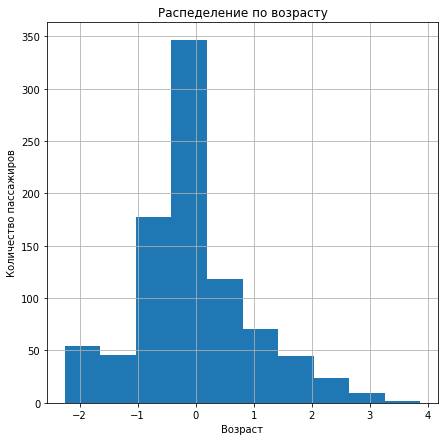

In [ ]:
plt.figure(figsize=(7,7))
plt.title('Распеделение по возрасту')
plt.xlabel('Возраст')
plt.ylabel('Количество пассажиров')
plt.hist(data["new_Age"])
plt.grid(True)
plt.show()

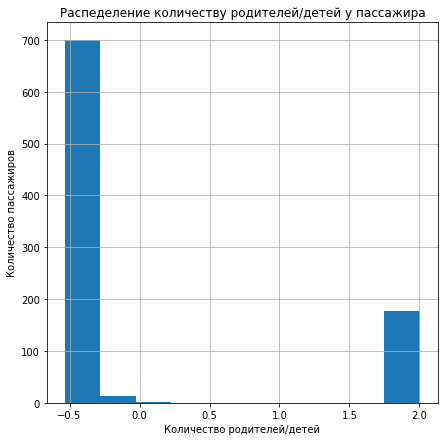

In [ ]:
plt.figure(figsize=(7,7))
plt.title('Распеделение количеству родителей/детей у пассажира')
plt.xlabel('Количество родителей/детей')
plt.ylabel('Количество пассажиров')
plt.hist(data["new_Parch"])
plt.grid(True)
plt.show()

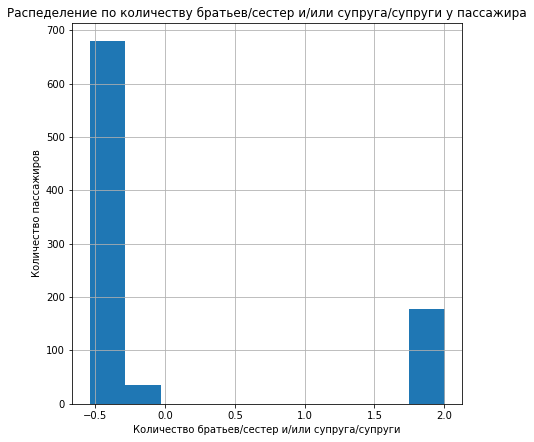

In [ ]:
plt.figure(figsize=(7,7))
plt.title('Распеделение по количеству братьев/сестер и/или супруга/супруги у пассажира')
plt.xlabel('Количество братьев/сестер и/или супруга/супруги')
plt.ylabel('Количество пассажиров')
plt.hist(data["new_SibSp"])
plt.grid(True)
plt.show()

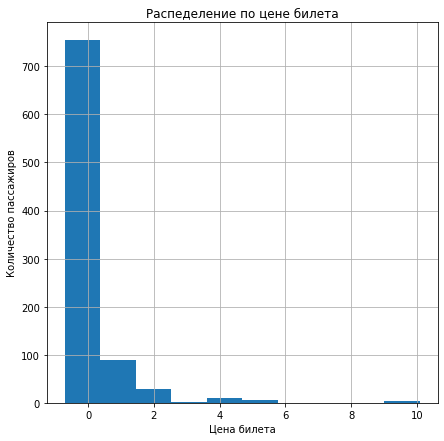

In [ ]:
plt.figure(figsize=(7,7))
plt.title('Распеделение по цене билета')
plt.xlabel('Цена билета')
plt.ylabel('Количество пассажиров')
plt.hist(data["new_Fare"])
plt.grid(True)
plt.show()

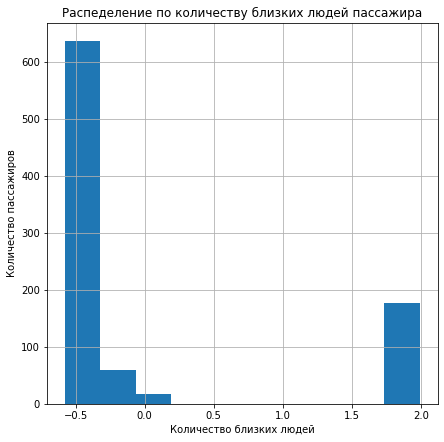

In [ ]:
plt.figure(figsize=(7,7))
plt.title('Распеделение по количеству близких людей пассажира')
plt.xlabel('Количество близких людей')
plt.ylabel('Количество пассажиров')
plt.hist(data["new_closePeople"])
plt.grid(True)
plt.show()

После нормализации значения всех призников стали лежать в диапазоне [-3;10], поэтому результат при работе с этими признаками будет правильным. Визуально графики не изменились, а это значит, что данные остались верны. Изменилась лишь градация оси X. Теперь можно как сравнивать объекты по нормированным признакам, так и сами признаки между собой.

### 16

Есть ли в данных категориальные признаки, которые принимают значения строк, а не чисел? Если да, то для многих алгоритмов это может стать серьезным препятствием, поэтому закодируйте категориальные признаки так, чтобы к данным можно было применить любые алгоритмы.

In [ ]:
#Хоть "Sex" бинарный признак, его тоже можно закодировать через 0 и 1, чтобы вообше не было строк
data.loc[data["Sex"]=="female", "Sex"]=0
data.loc[data["Sex"]=="male", "Sex"]=1


#factorize() - метод для кодирования строк как чисел
data['Cabin'] = pd.factorize(data['Cabin'])[0]

#"Embarked" определим значение 0,1,2 по очередности посещения портов
data.loc[data["Embarked"]=="Q", "Embarked"] = 0
data.loc[data["Embarked"]=="C", "Embarked"] = 1
data.loc[data["Embarked"]=="S", "Embarked"] = 2

data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,closePeople,AgeGroup,new_Age,new_Fare,new_Parch,new_SibSp,new_closePeople
0,0.0,3.0,"Braund, Mr. Owen Harris",1,22.0,1.0,0.0,7.2500,0,2,2.0,Young,-0.592162,-0.557980,-0.533396,-0.454628,-0.489059
1,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1.0,0.0,71.2833,1,1,2.0,Adults,0.638417,0.792725,-0.533396,-0.454628,-0.489059
2,1.0,3.0,"Heikkinen, Miss. Laina",0,26.0,0.0,0.0,7.9250,0,2,1.0,Young,-0.284517,-0.543742,-0.533396,-0.540232,-0.578666
3,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1.0,0.0,53.1000,2,2,2.0,Adults,0.407683,0.409170,-0.533396,-0.454628,-0.489059
4,0.0,3.0,"Allen, Mr. William Henry",1,35.0,0.0,0.0,8.0500,0,2,1.0,Adults,0.407683,-0.541105,-0.533396,-0.540232,-0.578666


## Бонусная часть на машинное обучение (до 10 бонусных баллов)

Если вам понравилась часть лекции про машинное обучение и вам хочется уже сейчас немного погрузиться в это самим, вашему вниманию предлагается простое и в то же время реальное задание на машинное обучение, за которое можно набрать большое количество бонусных баллов

### 17

Решите задачу бинарной классификации по предсказанию выживаемости пассажира (то есть целевая переменная $y$ - это столбец Survived; задача - для каждого объекта (то есть пассажира), по его признаковому пространству (то есть остальным столбцам) предсказать, выживет он или нет, на основе имеющихся данных). 

Для того чтобы это сделать, отделите от обучающей выборки целевую переменную `'Survived'` и обучите на них какой-нибудь алгоритм машинного обучения для классификации (для начинающих можно рекомендовать прочитать про, пожалуй, самый простой и понятный алгоритм для первичного освоения - kNN). С помощью выбранного и обученного вами алгоритма, постройте далее предсказание на тестовой выборке, предварительно обработав ее аналогичным образом, что и обучающую. 

In [ ]:
# your code here

На основе данных, с которыми вы работали, было сделано соревнование на Kaggle, ориентированное на начинающих Data Scientists: https://www.kaggle.com/c/titanic. Вам предлагается в нем поучаствовать — если вы дошли до этого момента, то для этого осталось совсем ничего. Зарегистрируйтесь на Kaggle и примите правила соревнования. Если у вас уже есть ответ для тестовой выборки, который вы хотите отправить для оценивания и попасть в лидерборд, его нужно добавить в .csv файл и оформить нужным образом. Для этого во вкладке с данными (https://www.kaggle.com/c/titanic/data) есть пример того, как должен выглядеть этот файл ("gender_submission.csv"). Вы можете скачать и изучить его. Для вашего удобства ниже приведен код, который позволяет сформировать файл для отправки.

In [ ]:
subm = pd.read_csv('gender_submission.csv')
subm['Survived'] = prediction_test

In [ ]:
subm.to_csv('test_subm_proba.csv', index=False)

Отправьте файл на оценивание с помощью кнопки "Submit Predictions". Метрика, используемая в соревновании — accuracy. Какой получился результат? Попробуйте его улучшить! Например, попробуйте выбрать признаки, которые были бы наиболее полезны для предсказания (feature selection) или создайте новые признаки (feature generation). 

### Важно!

Вы можете найти очень много полезной информации по этому доп.заданию в https://www.kaggle.com/c/titanic/kernels и https://www.kaggle.com/c/titanic/discussion!

Но воздержитесь от плагиата кода оттуда